In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

# Посмотрим на данные

In [2]:
train = pd.read_csv('/kaggle/input/recommendationsv4/train.csv')
test = pd.read_csv('/kaggle/input/recommendationsv4/test.csv')
submission = pd.read_csv('/kaggle/input/recommendationsv4/sample_submission.csv')


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
with open('../input/recommendationsv4/meta_Grocery_and_Gourmet_Food.json') as data:
    meta_list = []
    for line in data.readlines():
        meta_list.append(json.loads(line))
        
meta = pd.DataFrame(meta_list)

In [4]:
train.info()
train.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857895 entries, 0 to 857894
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         857895 non-null  float64
 1   verified        857895 non-null  bool   
 2   reviewTime      857895 non-null  object 
 3   asin            857895 non-null  object 
 4   reviewerName    857719 non-null  object 
 5   reviewText      857616 non-null  object 
 6   summary         857725 non-null  object 
 7   unixReviewTime  857895 non-null  int64  
 8   vote            118740 non-null  object 
 9   style           444406 non-null  object 
 10  image           7142 non-null    object 
 11  userid          857895 non-null  int64  
 12  itemid          857895 non-null  int64  
 13  rating          857895 non-null  float64
dtypes: bool(1), float64(2), int64(3), object(8)
memory usage: 85.9+ MB


,overall,verified,reviewTime,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,userid,itemid,rating
848584,5.0,True,"07 23, 2013",B0005XP7EG,Jenn,I have been dying my hair with food coloring f...,Inexpensive way to dye your hair red or pink i...,1374537600,4.0,"{'Size:': ' 16 fl oz', 'Flavor:': ' Red'}",NaN,18667,655,1.0
612086,5.0,True,"02 11, 2018",B00GH1BMQC,Amazon Customer,Great coffee! I use this one in the morning an...,Five Stars,1518307200,NaN,NaN,NaN,14907,26264,1.0


In [5]:
test.info()
test.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285965 entries, 0 to 285964
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   verified        285965 non-null  bool  
 1   reviewTime      285965 non-null  object
 2   asin            285965 non-null  object
 3   reviewerName    285918 non-null  object
 4   unixReviewTime  285965 non-null  int64 
 5   vote            39462 non-null   object
 6   style           147680 non-null  object
 7   image           2368 non-null    object
 8   userid          285965 non-null  int64 
 9   itemid          285965 non-null  int64 
 10  Id              285965 non-null  int64 
dtypes: bool(1), int64(4), object(6)
memory usage: 22.1+ MB


,verified,reviewTime,asin,reviewerName,unixReviewTime,vote,style,image,userid,itemid,Id
192326,True,"11 9, 2014",B001EO617M,Kenneth W. Kostolecki,1415491200,NaN,{'Size:': ' 16 Ounce (Pack of 4)'},NaN,18431,7863,192326
254146,True,"04 17, 2017",B00DLLWRCY,shopstoomuch,1492387200,NaN,{'Size:': ' 18 Tea Bags'},NaN,99467,23964,254146


In [6]:
meta.info()
meta.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287209 entries, 0 to 287208
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   category      287209 non-null  object
 1   description   251802 non-null  object
 2   title         287205 non-null  object
 3   brand         275787 non-null  object
 4   rank          275494 non-null  object
 5   also_view     121012 non-null  object
 6   main_cat      285716 non-null  object
 7   price         132136 non-null  object
 8   asin          287209 non-null  object
 9   also_buy      83332 non-null   object
 10  image         150214 non-null  object
 11  date          9663 non-null    object
 12  feature       16374 non-null   object
 13  details       273323 non-null  object
 14  similar_item  256 non-null     object
 15  tech1         744 non-null     object
 16  fit           4 non-null       object
dtypes: object(17)
memory usage: 37.3+ MB


,category,description,title,brand,rank,also_view,main_cat,price,asin,also_buy,image,date,feature,details,similar_item,tech1,fit
252472,"[Grocery & Gourmet Food, Beverages, Coffee, Te...",[You know that couple who completes each other...,Califia Farms Cold Brew Coffee with Almondmilk...,Califia Farms,"289,183inGroceryGourmetFood(",[B01KSX67T6],Grocery,NaN,B012CIK35O,"[B0136MFJF4, B00MIK62YS, B01FJWL7EG, B000SRJZZ...",[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN,NaN
261845,"[Grocery & Gourmet Food, Beverages, Coffee, Te...","[A true classic - our Original Blend is rich, ...",Kcup Dunkin' Donuts Orig,M Block And Sons Inc,"328,969inGroceryGourmetFood(",[B00XA1075Y],Grocery,NaN,B016V1LPKA,NaN,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN,NaN


In [7]:
# meta = meta.iloc[meta.astype(str).drop_duplicates().index]
train = train.drop_duplicates()

In [8]:
train['sample'] = 1
test['sample'] = 0
test['rating'] = -1

# data = test.append(train, sort=False).reset_index(drop=True)
data_full = pd.merge(train, meta, on='asin')

In [9]:
data_full.info()
data_full.sample(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847593 entries, 0 to 847592
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         847593 non-null  float64
 1   verified        847593 non-null  bool   
 2   reviewTime      847593 non-null  object 
 3   asin            847593 non-null  object 
 4   reviewerName    847425 non-null  object 
 5   reviewText      847315 non-null  object 
 6   summary         847426 non-null  object 
 7   unixReviewTime  847593 non-null  int64  
 8   vote            118861 non-null  object 
 9   style           440351 non-null  object 
 10  image_x         7138 non-null    object 
 11  userid          847593 non-null  int64  
 12  itemid          847593 non-null  int64  
 13  rating          847593 non-null  float64
 14  sample          847593 non-null  int64  
 15  category        847593 non-null  object 
 16  description     776098 non-null  object 
 17  title     

,overall,verified,reviewTime,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image_x,userid,itemid,rating,sample,category,description,title,brand,rank,also_view,main_cat,price,also_buy,image_y,date,feature,details,similar_item,tech1,fit
159967,4.0,True,"12 8, 2015",B000YBKP50,Olivia,A childhood memory of the Claxton Fruit Cake t...,See Pictures! Trusted Claxton Brand that has ...,1449532800,12.0,{'Size:': ' 1 Lb'},['https://images-na.ssl-images-amazon.com/imag...,1770,5287,1.0,1,"[Grocery & Gourmet Food, Breads & Bakery, Cakes]",[The perfect choice for those on your holiday ...,FRUIT CAKE Boxed -1 lb Regular Recipe Claxton ...,Claxton Fruitcake,"2,885inGroceryGourmetFood(","[B017V6ENVM, B000YCNFCY, B000YGOLR8, B002UZW4L...",Grocery,$8.99,"[B000YCNFCY, B017V6ENVM, B017L5YQPG, B002UZW4L...",[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,"\n\n\n\n\n\n <div class=""disclaim"">Size: <s...",NaN,NaN,NaN
256941,3.0,True,"08 4, 2015",B006G7WD2O,Jamie,not as good as other brands i've tried,Three Stars,1438646400,NaN,"{'Size:': ' Ethiopian Yirgacheffe', 'Style:': ...",NaN,63756,17347,0.0,1,"[Grocery & Gourmet Food, Beverages, Coffee, Te...","[This full bodied, yet well-balanced coffee of...","Marley Coffee, Organic Lively Up! Espresso Who...",Marley Coffee,"191,517inGroceryGourmetFood(",NaN,Grocery,$34.42,"[B01G26ET16, B01CI42XE6, B0066FDYB0, B009R2US7...",[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,"\n\n\n\n\n\n <div class=""disclaim"">Size: <s...",NaN,NaN,NaN


In [10]:
df=data_full.copy()

# EDA

In [11]:
df.isna().sum()

overall                0
verified               0
reviewTime             0
asin                   0
reviewerName         168
reviewText           278
summary              167
unixReviewTime         0
vote              728732
style             407242
image_x           840455
userid                 0
itemid                 0
rating                 0
sample                 0
category               0
description        71495
title                  0
brand               6104
rank               34598
also_view         384222
main_cat             955
price             258621
also_buy          120735
image_y            92239
date              835506
feature           704859
details            14608
similar_item      846455
tech1             843221
fit               847593
dtype: int64

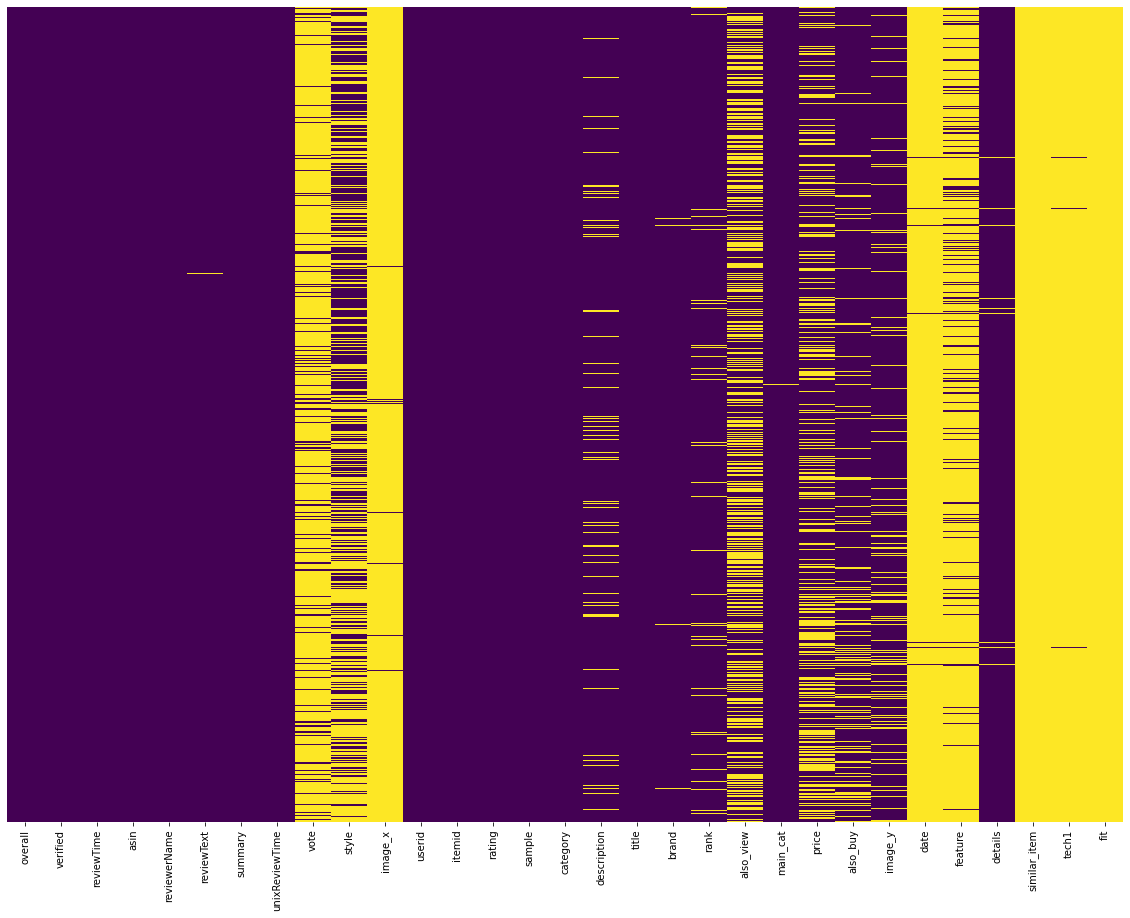

In [12]:
fig, ax = plt.subplots(figsize=(20,15))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Видим, что пропусков очень много, часть колонок не будут использоваться вообще, поэтому придется выжимать информацию из других. 

In [13]:
def show_info(col):
    print('Сколько пропусков? {}'.format(col.isna().sum()))
    print()
    print('Процент пропусков? {}%'.format((col.isna().sum() /len(col)) *100))
    print()      
    print('Описание:\n{}'.format(col.describe()))
    print()
    print('Как распределено?\n{}'.format(col.value_counts()))
    
def show_info_hist(col):
    print('Сколько пропусков? {}'.format(col.isna().sum()))
    print()
    print('Процент пропусков? {}%'.format((col.isna().sum() /len(col)) *100))
    print() 
    print('Описание:\n{}'.format(col.describe()))
    print()
    print('Как распределено?\n{}'.format(col.value_counts()))
    col.hist()

In [14]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'asin', 'reviewerName',
       'reviewText', 'summary', 'unixReviewTime', 'vote', 'style', 'image_x',
       'userid', 'itemid', 'rating', 'sample', 'category', 'description',
       'title', 'brand', 'rank', 'also_view', 'main_cat', 'price', 'also_buy',
       'image_y', 'date', 'feature', 'details', 'similar_item', 'tech1',
       'fit'],
      dtype='object')

In [15]:
df_dict={}

## overall

Сколько пропусков? 0

Процент пропусков? 0.0%

Описание:
count    847593.000000
mean          4.441068
std           1.065026
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

Как распределено?
5.0    607524
4.0    111868
3.0     59795
1.0     37071
2.0     31335
Name: overall, dtype: int64


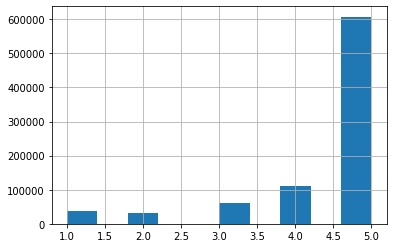

In [16]:
show_info_hist(df.overall)

In [17]:
df['overall']=df['overall'].astype('int32')

In [18]:
df_dict['overall']='Обработано, 5 видов значений'

## verified 

In [19]:
show_info(df.verified)

Сколько пропусков? 0

Процент пропусков? 0.0%

Описание:
count     847593
unique         2
top         True
freq      736369
Name: verified, dtype: object

Как распределено?
True     736369
False    111224
Name: verified, dtype: int64


In [20]:
dict_verified = {
    True: 1,
    False: 0
}
df.verified = df.verified.map(dict_verified)

Сколько пропусков? 0

Процент пропусков? 0.0%

Описание:
count    847593.000000
mean          0.868777
std           0.337645
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: verified, dtype: float64

Как распределено?
1    736369
0    111224
Name: verified, dtype: int64


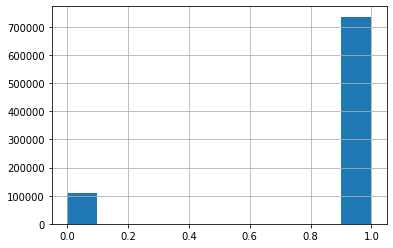

In [21]:
show_info_hist(df.verified)

In [22]:
df_dict['verified']='Пропусков нет, 2 вида значений'

Средняя оценка при значении verified = 1:  4.479455273103566
Средняя оценка при значении verified = 0:  4.186920089189384


<AxesSubplot:>

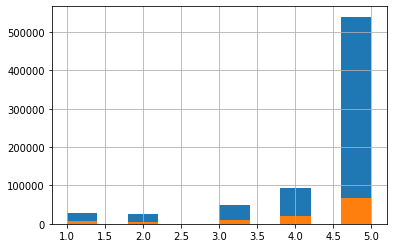

In [23]:
print('Средняя оценка при значении verified = 1: ',df[df.verified == 1].overall.mean())
df['overall'][df['verified'] == 1].hist(bins=10)
print('Средняя оценка при значении verified = 0: ',df[df.verified == 0].overall.mean())
df['overall'][df['verified'] == 0].hist(bins=10)

## reviewTime

In [24]:
show_info(df.reviewTime)

Сколько пропусков? 0

Процент пропусков? 0.0%

Описание:
count         847593
unique          4580
top       03 1, 2016
freq             941
Name: reviewTime, dtype: object

Как распределено?
03 1, 2016     941
07 14, 2016    873
01 20, 2016    783
06 3, 2015     783
02 20, 2016    767
              ... 
11 21, 2006      1
06 3, 2006       1
01 20, 2006      1
09 22, 2007      1
03 26, 2006      1
Name: reviewTime, Length: 4580, dtype: int64


In [25]:
df_dict['reviewTime'] = 'Пропусков нет, но формат даты удобнее в другом столбце, так что удалим'

## asin 

In [26]:
show_info(df.asin)

Сколько пропусков? 0

Процент пропусков? 0.0%

Описание:
count         847593
unique         41302
top       B00BUKL666
freq            5430
Name: asin, dtype: object

Как распределено?
B00BUKL666    5430
B00D3M2QP4    4733
B008QMX2SG    4611
B0001LO3FG    4252
B00R7PWK7W    2449
              ... 
B0014EQHR6       1
B000FDLB9Q       1
B00HFVVEPW       1
B00F9WMZO8       1
B004DIVQ3K       1
Name: asin, Length: 41302, dtype: int64


In [27]:
df_dict['asin']='Много уникальных значений, пропусков нет, не придумал, как использовать. Потом удалим'

## reviewerName 

In [28]:
show_info(df.reviewerName)

Сколько пропусков? 168

Процент пропусков? 0.01982083382000559%

Описание:
count              847425
unique             101207
top       Amazon Customer
freq                31346
Name: reviewerName, dtype: object

Как распределено?
Amazon Customer       31346
Kindle Customer        6128
Linda                   729
John                    714
David                   606
                      ...  
Emily Gilroy              1
Malikah J                 1
American -Bonsai          1
xxxxxxxxxxxxxxxxxx        1
R. Schuhmacher            1
Name: reviewerName, Length: 101207, dtype: int64


In [29]:
df_dict['reviewerName']='Много имен, мало пропусков, удалим, потому что есть более полезный столбец'

## unixReviewTime 

In [30]:
show_info(df.unixReviewTime)

Сколько пропусков? 0

Процент пропусков? 0.0%

Описание:
count    8.475930e+05
mean     1.441914e+09
std      5.992384e+07
min      9.657792e+08
25%      1.412122e+09
50%      1.449360e+09
75%      1.485130e+09
max      1.538438e+09
Name: unixReviewTime, dtype: float64

Как распределено?
1456790400    941
1468454400    873
1433289600    783
1453248000    783
1455926400    767
             ... 
1144972800      1
1114041600      1
1190419200      1
1161734400      1
1185408000      1
Name: unixReviewTime, Length: 4580, dtype: int64


In [31]:
from datetime import datetime
tsmin = df.unixReviewTime.min()
ts25 = int(df.unixReviewTime.quantile(0.25))
ts50 = int(df.unixReviewTime.quantile(0.50))
ts75 = int(df.unixReviewTime.quantile(0.75))
tsmax = df.unixReviewTime.max()
print('Самый первый отзыв:', datetime.utcfromtimestamp(tsmin).strftime('%Y-%m-%d %H:%M:%S'))
print('25 квантиль:', datetime.utcfromtimestamp(ts25).strftime('%Y-%m-%d %H:%M:%S'))
print('50 квантиль:', datetime.utcfromtimestamp(ts50).strftime('%Y-%m-%d %H:%M:%S'))
print('75 квантиль:', datetime.utcfromtimestamp(ts75).strftime('%Y-%m-%d %H:%M:%S'))
print('Последний отзыв:', datetime.utcfromtimestamp(tsmax).strftime('%Y-%m-%d %H:%M:%S'))

Самый первый отзыв: 2000-08-09 00:00:00
25 квантиль: 2014-10-01 00:00:00
50 квантиль: 2015-12-06 00:00:00
75 квантиль: 2017-01-23 00:00:00
Последний отзыв: 2018-10-02 00:00:00


In [32]:
def cat_date(x):
    if x <= ts25: x = 'very_old'
    elif ts25 < x <= ts50: x = 'old'
    elif ts50 < x <= ts75: x = 'new'
    elif ts75 < x: x = 'newest'
    return x      

# Заменим значения в столбце на категории
df.unixReviewTime = df.unixReviewTime.apply(lambda x: cat_date(x))

Сколько пропусков? 0

Процент пропусков? 0.0%

Описание:
count     847593
unique         4
top          new
freq      212136
Name: unixReviewTime, dtype: object

Как распределено?
new         212136
very_old    211990
old         211857
newest      211610
Name: unixReviewTime, dtype: int64


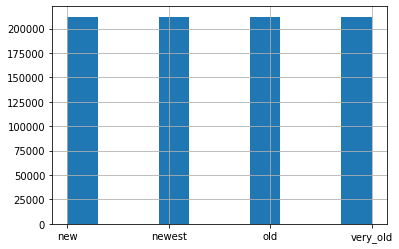

In [33]:
show_info_hist(df.unixReviewTime)

In [34]:
df_dict['unixReviewTime']='Обработано, пропусков нет'

## vote

In [35]:
show_info(df.vote)

Сколько пропусков? 728732

Процент пропусков? 85.97664209119236%

Описание:
count     118861.0
unique       477.0
top            2.0
freq       30774.0
Name: vote, dtype: float64

Как распределено?
2.0      30774
3.0      15336
2        13786
4.0       8893
3         6969
         ...  
317.0        1
316.0        1
223          1
221          1
152          1
Name: vote, Length: 477, dtype: int64


In [36]:
df.vote=df.vote.apply(lambda x: str(x).replace(',',''))
df.vote=df.vote.apply(lambda x: x.replace('nan','0'))
df.vote = df.vote.fillna(0)
df.vote = df.vote.astype('float')
df.vote = df.vote.astype('int')

Сколько пропусков? 0

Процент пропусков? 0.0%

Описание:
count    847593.000000
mean          0.944884
std           8.032598
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1626.000000
Name: vote, dtype: float64

Как распределено?
0      728732
2       44560
3       22305
4       12872
5        8275
        ...  
239         1
238         1
151         1
230         1
507         1
Name: vote, Length: 312, dtype: int64


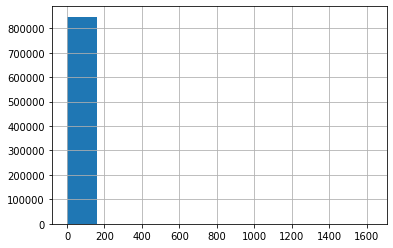

In [37]:
show_info_hist(df.vote)

In [38]:
def cat_vote(x):
    if x==0: x = 'no_rate'
    elif 0 < x < 5: x = 'low-rate'
    elif 5 <= x <= 10: x = 'middle-rate'
    elif 10 < x <= 100: x = 'high-rate'
    elif x > 100: x = 'extra-high'
    return x      

# Заменим значения в столбце на категории
df.vote= df.vote.apply(lambda x: cat_vote(x))

<AxesSubplot:>

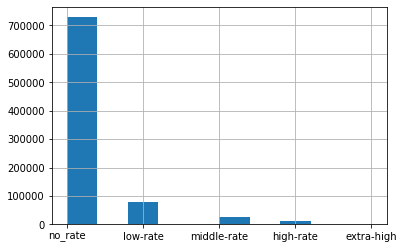

In [39]:
df.vote.hist()

In [40]:
df_dict['vote']='Пропуски заполнены, созданы 5 разных видов'

## style 

In [41]:
show_info(df['style'])

Сколько пропусков? 407242

Процент пропусков? 48.04688099123046%

Описание:
count                      440351
unique                      25892
top       {'Size:': ' Pack of 1'}
freq                         4856
Name: style, dtype: object

Как распределено?
{'Size:': ' Pack of 1'}                                         4856
{'Package Quantity:': ' 1'}                                     4526
{'Package Type:': ' Standard Packaging'}                        3898
{'Size:': ' 1 Pack'}                                            3848
{'Size:': ' 24 Count'}                                          3640
                                                                ... 
{'Flavor:': ' Plantain Strips Naturally Sweet'}                    1
{'Flavor:': ' Ultimate Berry'}                                     1
{'Flavor:': ' 2 lb Cashews'}                                       1
{'Size:': ' 2 oz', 'Flavor:': ' Citrus Berry'}                     1
{'Size:': ' 1 lb', 'Flavor:': ' Roasted Unsalted Hvs

In [42]:
df_dict['style']='Пропусков почти половина, это словари с разной информацией, так сразу не подступишься. Скорее всего удалим'

## image_x 

In [43]:
show_info(df.image_x)

Сколько пропусков? 840455

Процент пропусков? 99.15785052495714%

Описание:
count                                                  7138
unique                                                 6636
top       ['https://images-na.ssl-images-amazon.com/imag...
freq                                                      6
Name: image_x, dtype: object

Как распределено?
['https://images-na.ssl-images-amazon.com/images/I/71+Z1TA3eyL._SY88.jpg']                                                                              6
['https://images-na.ssl-images-amazon.com/images/I/712zJIOTV5L._SY88.jpg']                                                                              6
['https://images-na.ssl-images-amazon.com/images/I/81h8Zc+1rzL._SY88.jpg']                                                                              5
['https://images-na.ssl-images-amazon.com/images/I/41wx9Sn88cL._SY88.jpg']                                                                              5
['https://images-na.

In [44]:
df_dict['image_x']='Ссылки на картинки, подавляющего большинства нет. Удалим'

## userid 

Сколько пропусков? 0

Процент пропусков? 0.0%

Описание:
count    847593.000000
mean      53756.091163
std       37211.809152
min           0.000000
25%       20347.000000
50%       48581.000000
75%       84723.000000
max      127495.000000
Name: userid, dtype: float64

Как распределено?
842       427
17987     317
355       302
2024      296
2809      279
         ... 
112150      1
82011       1
32867       1
109270      1
125701      1
Name: userid, Length: 127448, dtype: int64


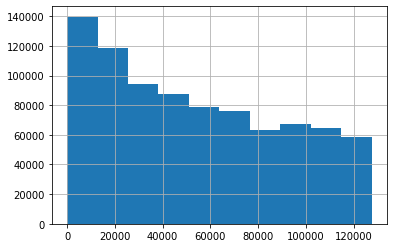

In [45]:
show_info_hist(df.userid)

In [46]:
df_dict['userid']='Пропусков нет, это номера пользователей'

## itemid 

Сколько пропусков? 0

Процент пропусков? 0.0%

Описание:
count    847593.00000
mean      17090.10489
std       11584.74670
min           0.00000
25%        6478.00000
50%       16108.00000
75%       26719.00000
max       41319.00000
Name: itemid, dtype: float64

Как распределено?
22208    5430
23540    4733
24556    4611
379      4252
32046    2449
         ... 
38602       1
40366       1
39236       1
16638       1
6440        1
Name: itemid, Length: 41302, dtype: int64


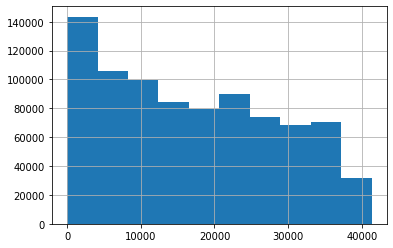

In [47]:
show_info_hist(df.itemid)

In [48]:
df_dict['itemid']='Пропусков нет, это id предметов'

## Id 

In [49]:
df_dict['Id']='Дублирующая колонка из df_test. Удалим'

## rating

Сколько пропусков? 0

Процент пропусков? 0.0%

Описание:
count    847593.000000
mean          0.848747
std           0.358296
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: rating, dtype: float64

Как распределено?
1.0    719392
0.0    128201
Name: rating, dtype: int64


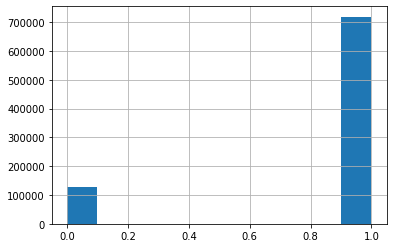

In [50]:
show_info_hist(df.rating)

In [51]:
df_dict['rating']='Пропусков нет, 3 разных типа'

## reviewText 

In [52]:
show_info(df.reviewText)

Сколько пропусков? 278

Процент пропусков? 0.032798760725961634%

Описание:
count     847315
unique    686739
top         good
freq        3071
Name: reviewText, dtype: object

Как распределено?
good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [53]:
df_dict['reviewText']='Описание, можно извлечь что-то, но нет в тесте'

## summary 

In [54]:
show_info(df.summary)

Сколько пропусков? 167

Процент пропусков? 0.019702852666315083%

Описание:
count         847426
unique        411451
top       Five Stars
freq          171328
Name: summary, dtype: object

Как распределено?
Five Stars                                              171328
Four Stars                                               26597
Three Stars                                              11913
One Star                                                  5300
Two Stars                                                 4920
                                                         ...  
good price, good for dipping into my favorite hummus         1
Healthy Jelthy                                               1
Not our flavor.                                              1
Best on Earth may be a little inflated                       1
Love the spicy and sweet taste of the tea                    1
Name: summary, Length: 411451, dtype: int64


In [55]:
df_dict['summary']='Описание, можно извлечь что-то, но нет в тесте'

## category 

In [56]:
df.category

0         [Grocery & Gourmet Food, Herbs, Spices & Seaso...
1         [Grocery & Gourmet Food, Herbs, Spices & Seaso...
2         [Grocery & Gourmet Food, Herbs, Spices & Seaso...
3         [Grocery & Gourmet Food, Herbs, Spices & Seaso...
4         [Grocery & Gourmet Food, Herbs, Spices & Seaso...
                                ...                        
847588    [Grocery & Gourmet Food, Candy & Chocolate, Ca...
847589    [Grocery & Gourmet Food, Jams, Jellies & Sweet...
847590    [Grocery & Gourmet Food, Beverages, Coffee, Te...
847591    [Grocery & Gourmet Food, Beverages, Coffee, Te...
847592    [Grocery & Gourmet Food, Canned, Jarred & Pack...
Name: category, Length: 847593, dtype: object

In [57]:
df_dict['category']='Пропусков нет, можно найти самые популярные категории. Подумаем'

## description 

In [58]:
df_dict['description']='В тесте нет, можно найти самые популярные категории. Подумаем'

## title 

In [59]:
show_info(df.title)

Сколько пропусков? 0

Процент пропусков? 0.0%

Описание:
count                                                847593
unique                                                41149
top       KIND Bars, Dark Chocolate Nuts & Sea Salt, Glu...
freq                                                   7435
Name: title, dtype: object

Как распределено?
KIND Bars, Dark Chocolate Nuts & Sea Salt, Gluten Free, 1.4 Ounce Bars, 12 Count      7435
KIND Bars, Dark Chocolate Chili Almond, Gluten Free, 1.4 Ounce Bars, 12 Count         4733
Kind Bars, Madagascar Vanilla Almond, Gluten Free, Low Sugar, 1.4oz                   4611
Twinings of London Pure Camomile Herbal Tea Bags, 20 Count                            4252
KIND Bars, Caramel Almond and Sea Salt, Gluten Free, 1.4 Ounce Bars, 12 Count         3079
                                                                                      ... 
Milk Maid Caramel Apple Candy Corn 9oz                                                   1
OliveNation Spearmin

In [60]:
df_dict['title']='Удалим'

## brand  

In [61]:
show_info(df.brand)

Сколько пропусков? 6104

Процент пропусков? 0.7201569621268699%

Описание:
count     841489
unique      8866
top         KIND
freq       22506
Name: brand, dtype: object

Как распределено?
KIND                22506
Bob's Red Mill      13061
Twinings            11182
Planters            10384
Frontier             6926
                    ...  
SEA2O                   1
Builders Tea            1
Tsogo                   1
Cocktail Rx             1
Fuel in a Bottle        1
Name: brand, Length: 8866, dtype: int64


In [62]:
df_dict['brand'] = 'Можно найти топовые бренды. Посмотрим'

## rank 

In [63]:
df['rank']

0          19,771inGroceryGourmetFood(
1          19,771inGroceryGourmetFood(
2          19,771inGroceryGourmetFood(
3          19,771inGroceryGourmetFood(
4          19,771inGroceryGourmetFood(
                      ...             
847588    212,433inGroceryGourmetFood(
847589    150,108inGroceryGourmetFood(
847590     14,497inGroceryGourmetFood(
847591       443,322inHealthHousehold(
847592     43,444inGroceryGourmetFood(
Name: rank, Length: 847593, dtype: object

In [64]:
import re
# Приведем все к str
df['rank'] = df['rank'].astype('str')
# Удалим все значения кроме числовых
df['rank'] = df['rank'].apply(lambda x: re.sub('\D', '', x))
# Заменим пропуски на высокий ранг (предположим, что чем ниже ранг, тем лучше)
df['rank'] = df['rank'].apply(lambda x: 9999999 if x == '' else x)
df['rank'] = df['rank'].astype('float')
# Остаются какие-то большие значения, заменим их на высокий ранг
df['rank'] = df['rank'].apply(lambda x: 9999999 if x > 9999999 else x)
df['rank'] = df['rank'].astype('int32')
# Посмотрим на результат
df['rank']

0          19771
1          19771
2          19771
3          19771
4          19771
           ...  
847588    212433
847589    150108
847590     14497
847591    443322
847592     43444
Name: rank, Length: 847593, dtype: int32

In [65]:
# Создадим 3 категории рангов
def cat_rank(x):
    if x < 1093: x = 'high'
    elif 1093 <= x <= 18000: x = 'middle'
    elif 18000 < x: x = 'low'
    return x      

# Заменим значения в столбце на категории
df['rank'] = df['rank'].apply(lambda x: cat_rank(x))

Сколько пропусков? 0

Процент пропусков? 0.0%

Описание:
count     847593
unique         3
top          low
freq      575847
Name: rank, dtype: object

Как распределено?
low       575847
middle    217668
high       54078
Name: rank, dtype: int64


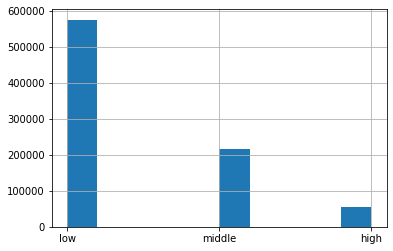

In [66]:
show_info_hist(df['rank'])

In [67]:
df_dict['rank']='Сделали 3 категории'

## also_view 

In [68]:
df.also_view

0         [B00AJRKRJS, B01NALHAY9, B01DGZ2B48, B01EZ489A...
1         [B00AJRKRJS, B01NALHAY9, B01DGZ2B48, B01EZ489A...
2         [B00AJRKRJS, B01NALHAY9, B01DGZ2B48, B01EZ489A...
3         [B00AJRKRJS, B01NALHAY9, B01DGZ2B48, B01EZ489A...
4         [B00AJRKRJS, B01NALHAY9, B01DGZ2B48, B01EZ489A...
                                ...                        
847588    [B004RASYSE, B0007KLGC4, B004R34A48, B004ROS57...
847589    [B073SHX9X9, B073SHFN7C, B06WWRK7VT, B079KKM9B...
847590                                                  NaN
847591                                                  NaN
847592                                                  NaN
Name: also_view, Length: 847593, dtype: object

In [69]:
df_dict['also_view']='Много пропусков, удалим'

## main_cat 

In [70]:
df.main_cat

0                        Grocery
1                        Grocery
2                        Grocery
3                        Grocery
4                        Grocery
                   ...          
847588                   Grocery
847589                   Grocery
847590                   Grocery
847591    Health & Personal Care
847592                   Grocery
Name: main_cat, Length: 847593, dtype: object

In [71]:
df.main_cat = df.main_cat.fillna('Other')

In [72]:
df_dict['main_cat']='Сделать dummy'

## price 

In [73]:
show_info(df.price)

Сколько пропусков? 258621

Процент пропусков? 30.512403948593253%

Описание:
count     588972
unique      4601
top       $14.99
freq       14241
Name: price, dtype: object

Как распределено?
$14.99              14241
$13.67              10660
$19.99               9043
$14.79               5632
$15.53               5561
                    ...  
$34.07                  2
$35.16                  1
$6.93                   1
$19.99 - $295.00        1
$44.14                  1
Name: price, Length: 4601, dtype: int64


In [74]:
# Скопируем датасет
df_price = df.copy()
# Избавимся от пропусков
df_price = df_price[df_price.price.isna() == False]
df_price = df_price[df_price.price != '']
# Приведем все к str
df_price['price'] = df_price['price'].astype('str')
# Удалим все значения кроме числовых
df_price['price'] = df_price['price'].apply(lambda x: re.sub('\D', '', x))
# Переведем во float
df_price['price'] = df_price['price'].astype('float')
# Удалим все, что дороже 9999$ т.к. это, скорее всего, ошибка
df_price = df_price[df_price.price < 999999]
# Посмотрим на результат
show_info(df_price.price)


Сколько пропусков? 0

Процент пропусков? 0.0%

Описание:
count    585001.000000
mean       2069.952270
std        1754.135664
min           1.000000
25%        1155.000000
50%        1691.000000
75%        2599.000000
max       99900.000000
Name: price, dtype: float64

Как распределено?
1499.0    14241
1367.0    10660
1999.0     9043
1479.0     5632
1553.0     5561
          ...  
3407.0        2
3005.0        2
4414.0        1
693.0         1
3516.0        1
Name: price, Length: 4527, dtype: int64


Сколько пропусков? 0

Процент пропусков? 0.0%

Описание:
count    847593.000000
mean       2069.967057
std        1457.295712
min           1.000000
25%        1398.000000
50%        2070.000000
75%        2112.000000
max       99900.000000
Name: price, dtype: float64

Как распределено?
2070    262805
1499     14241
1367     10660
1999      9043
1479      5632
         ...  
1931         2
2033         2
3516         1
4414         1
693          1
Name: price, Length: 4527, dtype: int64


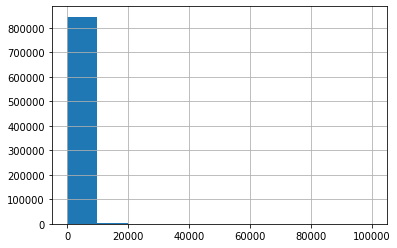

In [75]:
# Чтобы каждый раз не считать среднее значение, используем переменную
df_price_mean = df_price.price.mean()
# Приведем все к str
df['price'] = df['price'].astype('str')
# Удалим все значения кроме числовых
df['price'] = df['price'].apply(lambda x: re.sub('\D', '', x))
# Заменим пропуски на среднее значение
df['price'] = df['price'].apply(lambda x: round(df_price_mean, 0) if x == '' else x)
# Приведем к float
df['price'] = df['price'].astype('float')
# Заменим большие значения на средние
df['price'] = df['price'].apply(lambda x: round(df_price_mean, 0) if x > 999999 else x)
# Приведем к int32
df['price'] = df['price'].astype('int32')
# Смотрим на результат
show_info_hist(df.price)

In [76]:
def cat_price(x):
    if x < 1397: x = 'low'
    elif 1397 <= x <= 2099: x = 'middle'
    elif 2099 < x: x = 'high'
    return x      

df['price'] = df['price'].apply(lambda x: cat_price(x))

## also_buy 

In [77]:
df.also_buy

0         [B01DGZ2B48, B01EZ489AO, B01DH795LM, B01EYW2LC...
1         [B01DGZ2B48, B01EZ489AO, B01DH795LM, B01EYW2LC...
2         [B01DGZ2B48, B01EZ489AO, B01DH795LM, B01EYW2LC...
3         [B01DGZ2B48, B01EZ489AO, B01DH795LM, B01EYW2LC...
4         [B01DGZ2B48, B01EZ489AO, B01DH795LM, B01EYW2LC...
                                ...                        
847588                                                  NaN
847589    [B073SHX9X9, B01H68M39Y, B00GU19JRI, B0799CH1Z...
847590    [B001O4EKJI, B002H1PS34, B00WRGGB7G, B005DOQME...
847591                                                  NaN
847592    [B019YHTJ2E, B000KHMWQS, B00MK5E2Q6, B00F9XCEM...
Name: also_buy, Length: 847593, dtype: object

In [78]:
df_dict['also_buy']='Удалим'

## image_y 

In [79]:
df.image_y

0         [https://images-na.ssl-images-amazon.com/image...
1         [https://images-na.ssl-images-amazon.com/image...
2         [https://images-na.ssl-images-amazon.com/image...
3         [https://images-na.ssl-images-amazon.com/image...
4         [https://images-na.ssl-images-amazon.com/image...
                                ...                        
847588    [https://images-na.ssl-images-amazon.com/image...
847589    [https://images-na.ssl-images-amazon.com/image...
847590    [https://images-na.ssl-images-amazon.com/image...
847591                                                  NaN
847592                                                  NaN
Name: image_y, Length: 847593, dtype: object

In [80]:
df_dict['image_y']='Картинки, удалим'


## date 

In [81]:
show_info(df.date)

Сколько пропусков? 835506

Процент пропусков? 98.57396179534281%

Описание:
count               12087
unique                417
top       January 1, 2006
freq                  561
Name: date, dtype: object

Как распределено?
January 1, 2006      561
May 5, 2003          428
October 29, 2003     424
January 7, 2008      372
March 10, 2004       294
                    ... 
December 22, 2007      2
April 6, 2015          2
February 13, 2008      1
February 21, 2015      1
January 18, 2008       1
Name: date, Length: 417, dtype: int64


In [82]:
df_dict['date']='Очень много пропусков, удалим'

## feature 

In [83]:
df.feature

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
847588    NaN
847589    NaN
847590    NaN
847591    NaN
847592    NaN
Name: feature, Length: 847593, dtype: object

In [84]:
df_dict['feature']='Удалим'

## details 

In [85]:
df.details

0         \n      <div class="content">\n\n\n\n\n\n\n<ul...
1         \n      <div class="content">\n\n\n\n\n\n\n<ul...
2         \n      <div class="content">\n\n\n\n\n\n\n<ul...
3         \n      <div class="content">\n\n\n\n\n\n\n<ul...
4         \n      <div class="content">\n\n\n\n\n\n\n<ul...
                                ...                        
847588    \n      <div class="content">\n\n\n\n\n\n\n<ul...
847589    \n\n\n\n\n\n    <div class="disclaim">Flavor: ...
847590    \n      <div class="content">\n\n\n\n\n\n\n<ul...
847591    \n      <div class="content">\n\n\n\n\n\n\n<ul...
847592    \n\n\n\n\n\n    <div class="disclaim">Flavor: ...
Name: details, Length: 847593, dtype: object

In [86]:
show_info(df.details)

Сколько пропусков? 14608

Процент пропусков? 1.7234686931109626%

Описание:
count                                                832985
unique                                                40368
top       \n\n\n\n\n\n    <div class="disclaim">Flavor: ...
freq                                                   5430
Name: details, dtype: object

Как распределено?
\n\n\n\n\n\n    <div class="disclaim">Flavor: <strong>Dark Chocolate Nuts & Sea Salt</strong>&nbsp;|&nbsp;Size: <strong>12 Bars</strong></div>\n\n\n\n\n          <div class="content">\n\n\n\n\n\n\n<ul>\n\n\n\n\n\n\n\n\n\n\n\n\n\n                                                                                \n\n\n    <li><b>\n    Product Dimensions: \n    </b>\n    6.8 x 6.1 x 2.3 inches ; 1.05 pounds\n    </li>\n\n\n\n\n\n\n\n\n<li><b>Shipping Weight:</b> 1.2 pounds (<a href="/gp/help/seller/shipping.html/ref=dp_pd_shipping?ie=UTF8&amp;asin=B007PE7ANY&amp;seller=ATVPDKIKX0DER">View shipping rates and policies</a>)</li>\n\n\n\n\

In [87]:
df_dict['details']='Удалим'

## similar_item 

In [88]:
df.similar_item

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
847588    NaN
847589    NaN
847590    NaN
847591    NaN
847592    NaN
Name: similar_item, Length: 847593, dtype: object

In [89]:
df_dict['similar_item']='Удалим'

## tech1 

In [90]:
df.tech1

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
847588    NaN
847589    NaN
847590    NaN
847591    NaN
847592    NaN
Name: tech1, Length: 847593, dtype: object

In [91]:
df_dict['tech1']='Удалим'

## fit 

In [92]:
df.fit

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
847588    NaN
847589    NaN
847590    NaN
847591    NaN
847592    NaN
Name: fit, Length: 847593, dtype: object

In [93]:
show_info(df.fit)

Сколько пропусков? 847593

Процент пропусков? 100.0%

Описание:
count       0
unique      0
top       NaN
freq      NaN
Name: fit, dtype: object

Как распределено?
Series([], Name: fit, dtype: int64)


In [94]:
df_dict['fit']='Удалим'

### Закончили обработку признаков, посмотрим, что мы про них написали и почистим данные. 

In [95]:
df_dict

{'overall': 'Обработано, 5 видов значений',
 'verified': 'Пропусков нет, 2 вида значений',
 'reviewTime': 'Пропусков нет, но формат даты удобнее в другом столбце, так что удалим',
 'asin': 'Много уникальных значений, пропусков нет, не придумал, как использовать. Потом удалим',
 'reviewerName': 'Много имен, мало пропусков, удалим, потому что есть более полезный столбец',
 'unixReviewTime': 'Обработано, пропусков нет',
 'vote': 'Пропуски заполнены, созданы 5 разных видов',
 'style': 'Пропусков почти половина, это словари с разной информацией, так сразу не подступишься. Скорее всего удалим',
 'image_x': 'Ссылки на картинки, подавляющего большинства нет. Удалим',
 'userid': 'Пропусков нет, это номера пользователей',
 'itemid': 'Пропусков нет, это id предметов',
 'Id': 'Дублирующая колонка из df_test. Удалим',
 'rating': 'Пропусков нет, 3 разных типа',
 'reviewText': 'Описание, можно извлечь что-то, но нет в тесте',
 'summary': 'Описание, можно извлечь что-то, но нет в тесте',
 'category': 

In [96]:
df1=df.copy()
df_f=df.copy()

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847593 entries, 0 to 847592
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         847593 non-null  int32  
 1   verified        847593 non-null  int64  
 2   reviewTime      847593 non-null  object 
 3   asin            847593 non-null  object 
 4   reviewerName    847425 non-null  object 
 5   reviewText      847315 non-null  object 
 6   summary         847426 non-null  object 
 7   unixReviewTime  847593 non-null  object 
 8   vote            847593 non-null  object 
 9   style           440351 non-null  object 
 10  image_x         7138 non-null    object 
 11  userid          847593 non-null  int64  
 12  itemid          847593 non-null  int64  
 13  rating          847593 non-null  float64
 14  sample          847593 non-null  int64  
 15  category        847593 non-null  object 
 16  description     776098 non-null  object 
 17  title     

In [98]:
# df.drop(['reviewTime'], axis=1, inplace=True)

In [99]:
df.drop(['asin','reviewTime','reviewerName','style','reviewText','category','description','title',
        'also_view','also_buy','image_x','image_y','date','feature','details','similar_item',
         'tech1','fit','summary','brand'], axis=1, inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847593 entries, 0 to 847592
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         847593 non-null  int32  
 1   verified        847593 non-null  int64  
 2   unixReviewTime  847593 non-null  object 
 3   vote            847593 non-null  object 
 4   userid          847593 non-null  int64  
 5   itemid          847593 non-null  int64  
 6   rating          847593 non-null  float64
 7   sample          847593 non-null  int64  
 8   rank            847593 non-null  object 
 9   main_cat        847593 non-null  object 
 10  price           847593 non-null  object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 74.4+ MB


### Подробнее изучим оставшиеся признаки 

In [101]:
from itertools import combinations
from scipy.stats import ttest_ind

In [102]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='overall', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

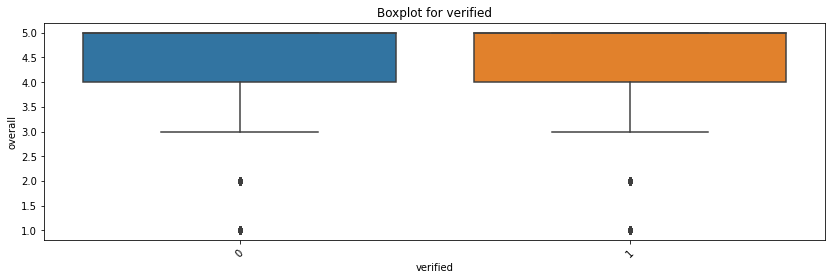

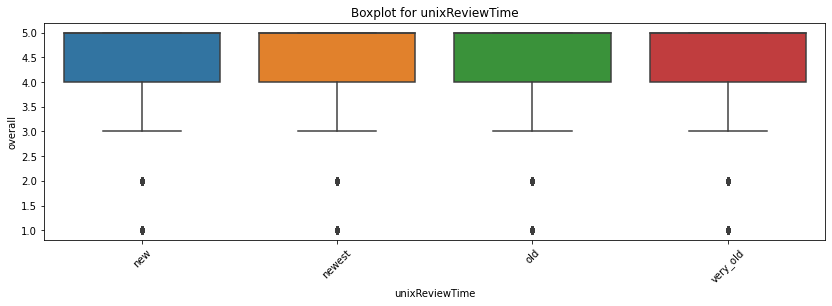

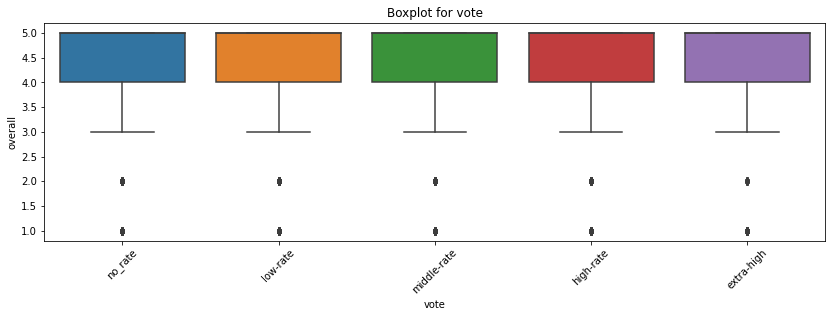

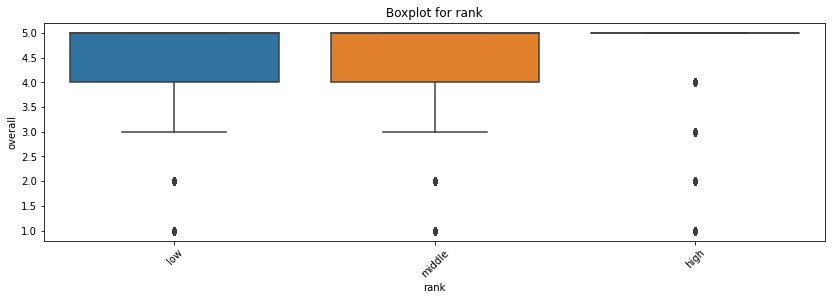

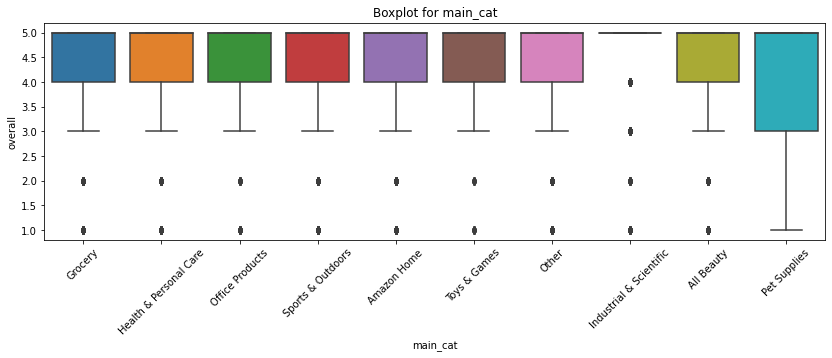

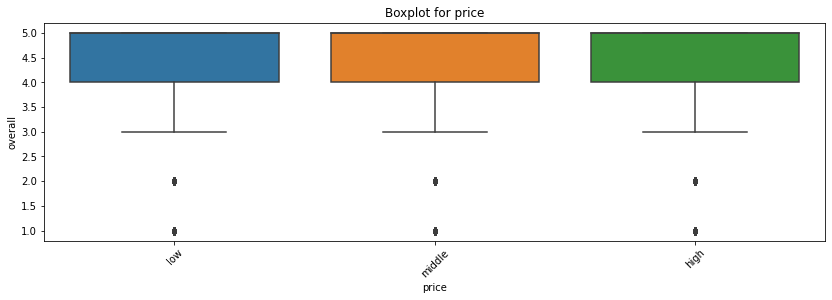

In [103]:
for col in ['verified', 'unixReviewTime', 'vote', 'rank', 'main_cat', 'price']:
    get_boxplot(col)

In [104]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'overall'], 
                        df.loc[df.loc[:, column] == comb[1], 'overall']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

for col in ['verified', 'unixReviewTime', 'vote', 'rank', 'main_cat', 'price']:
    get_stat_dif(col)            

Найдены статистически значимые различия для колонки verified
Найдены статистически значимые различия для колонки unixReviewTime
Найдены статистически значимые различия для колонки vote
Найдены статистически значимые различия для колонки rank
Найдены статистически значимые различия для колонки main_cat
Найдены статистически значимые различия для колонки price


In [105]:
df = df.drop('overall', axis=1)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847593 entries, 0 to 847592
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   verified        847593 non-null  int64  
 1   unixReviewTime  847593 non-null  object 
 2   vote            847593 non-null  object 
 3   userid          847593 non-null  int64  
 4   itemid          847593 non-null  int64  
 5   rating          847593 non-null  float64
 6   sample          847593 non-null  int64  
 7   rank            847593 non-null  object 
 8   main_cat        847593 non-null  object 
 9   price           847593 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 71.1+ MB


In [107]:
import scipy.sparse as sparse

from lightfm import LightFM
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import auc_score, precision_at_k, recall_at_k
import sklearn
from sklearn.model_selection import train_test_split

import scipy.sparse as sparse

## только на трейне 

(Используется train, который разбивается на обучающую и тестовую выборки)

In [108]:
train_data, test_data = train_test_split(train,random_state=32, shuffle=True)

ratings_coo = sparse.coo_matrix((train_data['rating'].astype(int),
                                 (train_data['userid'],
                                  train_data['itemid'],)))

LR = 0.089
NUM_THREADS = 12 #число потоков
NUM_COMPONENTS = 160 #число параметров вектора 
NUM_EPOCHS = 25 #число эпох обучения
LEARNING_SCHEDULE = 'adagrad'
LOSS_FUNCTION = 'logistic'
RANDOM_STATE = 20

model = LightFM(
    learning_rate=LR,
    loss=LOSS_FUNCTION,
    no_components=NUM_COMPONENTS,
    learning_schedule = LEARNING_SCHEDULE,
    random_state = RANDOM_STATE
)
model = model.fit(
    ratings_coo,
    epochs=NUM_EPOCHS,
    num_threads=NUM_THREADS
)

preds = model.predict(test_data.userid.values,
                      test_data.itemid.values)

sklearn.metrics.roc_auc_score(test_data.rating,preds)

0.7287881546546974

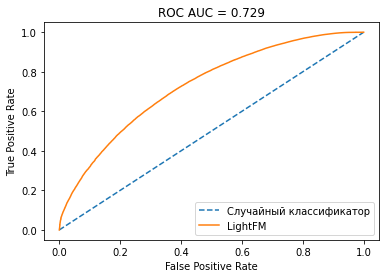

In [109]:
from sklearn.metrics import roc_curve, roc_auc_score

def show_roc_curve(y_true, y_pred_prob):
    """Функция отображает ROC-кривую"""
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    plt.figure()
    plt.plot([0, 1], label='Случайный классификатор', linestyle='--')
    plt.plot(fpr, tpr, label = 'LightFM')
    plt.title('ROC AUC = %0.3f' % roc_auc_score(y_true, y_pred_prob))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()
    
    
    
show_roc_curve(test_data.rating, preds) 

In [110]:
preds.shape

(207234,)

## на df 

(Берется объединенный df, который разбивается на тестовую и обучающую выборки)

In [111]:
LEARNING_RATE = 0.089
RANDOM_STATE = 42
NUM_THREADS = 12
NUM_COMPONENTS = 160 
NUM_EPOCHS = 25
LEARNING_SCHEDULE = 'adagrad'
LOSS_FUNCTION = 'logistic'

train1 = df.query('sample == 1').drop('sample', axis = 1)
test1 = df.query('sample == 0').drop(['sample', 'rating'], axis = 1)

train_data1, test_data1 = train_test_split(train1,
                                         random_state = RANDOM_STATE, 
                                         shuffle = True)

ratings_coo = sparse.coo_matrix((train_data1['rating'].astype(int), 
                                 (train_data1['userid'], 
                                  train_data1['itemid'])))

model1 = LightFM(learning_rate = LEARNING_RATE, 
                loss = LOSS_FUNCTION,
                no_components = NUM_COMPONENTS,
                random_state = RANDOM_STATE,
                learning_schedule = LEARNING_SCHEDULE)

model1 = model1.fit(ratings_coo, 
                  epochs = NUM_EPOCHS, 
                  num_threads = NUM_THREADS)

preds1 = model1.predict(test_data1.userid.values,
                      test_data1.itemid.values)

sklearn.metrics.roc_auc_score(test_data1.rating, preds1)

0.7414473265837693

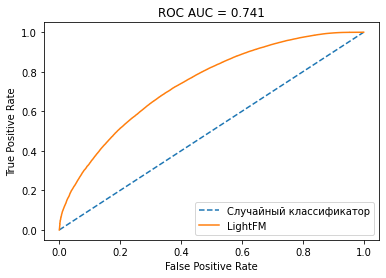

In [112]:
from sklearn.metrics import roc_curve, roc_auc_score

def show_roc_curve(y_true, y_pred_prob):
    """Функция отображает ROC-кривую"""
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    plt.figure()
    plt.plot([0, 1], label='Случайный классификатор', linestyle='--')
    plt.plot(fpr, tpr, label = 'LightFM')
    plt.title('ROC AUC = %0.3f' % roc_auc_score(y_true, y_pred_prob))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()
    
    
    
show_roc_curve(test_data1.rating, preds1)  

In [113]:
preds1.shape

(211899,)

## на чистом трейне 

(обучаем на всем трейне)

In [114]:
ratings_coo2 = sparse.coo_matrix((train['rating'].astype(int),
                                 (train['userid'],
                                  train['itemid'],)))

# Обучим модель
model2 = LightFM(
    learning_rate=LR,
    loss=LOSS_FUNCTION,
    no_components=NUM_COMPONENTS,
    learning_schedule = LEARNING_SCHEDULE,
    random_state = RANDOM_STATE
)
model2 = model.fit(
    ratings_coo2,
    epochs=NUM_EPOCHS,
    num_threads=NUM_THREADS
)
preds2 = model2.predict(test.userid.values,
                      test.itemid.values)

In [115]:
#sklearn.metrics.roc_auc_score(test.rating, preds2)

In [116]:
preds2.shape

(285965,)

In [117]:
normalized_preds = (preds2 - preds2.min())/(preds2 - preds2.min()).max()
submission['rating']= normalized_preds
submission.to_csv('submission_1.csv', index=False)

## Feature engineering

In [118]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847593 entries, 0 to 847592
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         847593 non-null  int32  
 1   verified        847593 non-null  int64  
 2   reviewTime      847593 non-null  object 
 3   asin            847593 non-null  object 
 4   reviewerName    847425 non-null  object 
 5   reviewText      847315 non-null  object 
 6   summary         847426 non-null  object 
 7   unixReviewTime  847593 non-null  object 
 8   vote            847593 non-null  object 
 9   style           440351 non-null  object 
 10  image_x         7138 non-null    object 
 11  userid          847593 non-null  int64  
 12  itemid          847593 non-null  int64  
 13  rating          847593 non-null  float64
 14  sample          847593 non-null  int64  
 15  category        847593 non-null  object 
 16  description     776098 non-null  object 
 17  title     

### Добавим несколько дат 

In [119]:
df_f['datetime'] = pd.to_datetime(df_f.reviewTime, format='%m %d, %Y')

In [120]:
df_f['review_year'] = df_f.datetime.dt.year
df_f['review_month'] = df_f.datetime.dt.month
df_f['review_day'] = df_f.datetime.dt.day
#df_f['review_dayofweek'] = df_f.datetime.dt.dayofweek.astype(object)
df_f.sample()

,overall,verified,reviewTime,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image_x,userid,itemid,rating,sample,category,description,title,brand,rank,also_view,main_cat,price,also_buy,image_y,date,feature,details,similar_item,tech1,fit,datetime,review_year,review_month,review_day
737595,4,1,"12 30, 2016",B0104L8WN6,Verl,"Better than tea bags, So far OK",Reusable. I do it three times,new,no_rate,{'Size:': ' 4oz / 110g'},NaN,44934,34403,1.0,1,"[Grocery & Gourmet Food, Beverages, Coffee, Te...",[Imperial Ren Shen Ginseng Oolong is composed ...,Tealyra - Imperial Ginseng Ren Shen - Oolong L...,Tealyra,low,NaN,Grocery,high,"[B00JJU3KWW, B0719GQCQ5, B01FCEIA00, B00OU2AE4...",[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,"\n\n\n\n\n\n <div class=""disclaim"">Size: <s...",NaN,NaN,NaN,2016-12-30,2016,12,30


### Поиграем с именами 

In [121]:
df_f.reviewerName.value_counts()

Amazon Customer       31346
Kindle Customer        6128
Linda                   729
John                    714
David                   606
                      ...  
Emily Gilroy              1
Malikah J                 1
American -Bonsai          1
xxxxxxxxxxxxxxxxxx        1
R. Schuhmacher            1
Name: reviewerName, Length: 101207, dtype: int64

In [122]:
def rev_name(x):
    if x == 'Amazon Customer': x = 'Amazon'
    elif  x == 'Kindle Customer': x = 'Kindle'
    else:
        x = 'Other'
    return x      

# Заменим значения в столбце на категории
df_f.reviewerName = df_f.reviewerName.apply(lambda x: rev_name(x))

## Расширим reviewText 

In [123]:
from collections import Counter

In [124]:

# Зададим переменной количество наиболее частов встречающихся слов, которое хотим оставить
N_WORDS = 200

# Приведем значения к str
df_f['reviewText']=df_f['reviewText'].astype('str')
# Разбиваем reviewText на список слов, предварительно приводим текст к нижнему регистру
df_f['reviewText']=df_f['reviewText'].apply(lambda x: re.sub("[^\w]", " ",  x.lower()).split())
                                        
# Создаем пустой список, в который будут добавляться все слова
all_words = []

# Добавляем слова каждой записи в общий список
for words in df_f.reviewText:
    # разбиваем текст на слова, предварительно приводим к нижнему регистру
    all_words.extend(words)

# Считаем частоту слов в датасете
cnt = Counter()
for word in all_words:
    cnt[word] +=1
    
#Оставим топ N_WORDS слов
top_words = []
for i in range (0, len(cnt.most_common(N_WORDS))):
    words = cnt.most_common(N_WORDS)[i][0]
    top_words.append(words)
    
# Удаляем дубликаты из all_words
all_words = list(dict.fromkeys(all_words))

print('Всего слов ', len(all_words))
print('Топ', N_WORDS, 'слов: ',top_words)

Всего слов  104774
Топ 200 слов:  ['the', 'i', 'and', 'a', 'it', 'to', 'of', 'is', 'this', 'in', 'for', 'my', 'but', 'that', 'you', 'not', 'with', 'good', 'are', 'have', 'as', 't', 'great', 'like', 'these', 'they', 's', 'so', 'was', 'on', 'taste', 'very', 'flavor', 'love', 'or', 'them', 'just', 'be', 'tea', 'can', 'coffee', 'product', 'one', 'if', 'at', 'all', 'will', 'more', 'use', 'from', 'me', 'than', 'when', 'has', 'really', 'we', 'too', 'some', 'would', 'no', 'had', 'price', 'out', 'get', 'much', 'other', 'don', 'buy', 'best', 'make', 'time', 'little', 'sugar', 'delicious', 'up', 'an', 'there', 'what', 'only', 've', 'chocolate', 'also', 'about', 'better', 'were', 'again', 'well', 'm', 'your', 'because', 'do', 'which', 'am', 'nice', 'tastes', 'sweet', 'used', 'tried', 'fresh', 'find', 'even', 'by', 'been', 'try', 'water', 'amazon', 'any', 'favorite', 'bag', 'eat', 'cup', 'now', 'quality', 'add', 'after', 'way', '2', 'free', 'bit', 'bought', 'salt', 'tasty', 'made', 'organic', 'stuf

In [125]:
top_word_list = ['good','great','like','so','taste','very','flavor','love','tea','product','coffee','more','really',
                 'price','much','buy','best','make','time','sugar','little','delicious','only','chocolate','better',
                 'again','well','nice','tastes','sweet','fresh','favorite','eat','cup','now','quality','tasty',
    'salt','organic','brand','flavors','oil','perfect','first','order','many','box','mix','always','hot',
]

In [126]:
#Функция, которая присваивает 1, если в описании есть слово из топ-списка, 0 - если нет.
def if_in_top_word(words):
    for word in words:
        if word in top_word_list:
            return 1
        else:
            return 0
        
df_f['reviewText'] = df_f['reviewText'].apply(lambda x: if_in_top_word(x))       

In [127]:
df_f['reviewText'].value_counts()

0.0    621599
1.0    225713
Name: reviewText, dtype: int64

In [128]:
df_f['reviewText']=df_f.reviewText.fillna(1)

## Расширим Category 

In [129]:
df_f.category

0         [Grocery & Gourmet Food, Herbs, Spices & Seaso...
1         [Grocery & Gourmet Food, Herbs, Spices & Seaso...
2         [Grocery & Gourmet Food, Herbs, Spices & Seaso...
3         [Grocery & Gourmet Food, Herbs, Spices & Seaso...
4         [Grocery & Gourmet Food, Herbs, Spices & Seaso...
                                ...                        
847588    [Grocery & Gourmet Food, Candy & Chocolate, Ca...
847589    [Grocery & Gourmet Food, Jams, Jellies & Sweet...
847590    [Grocery & Gourmet Food, Beverages, Coffee, Te...
847591    [Grocery & Gourmet Food, Beverages, Coffee, Te...
847592    [Grocery & Gourmet Food, Canned, Jarred & Pack...
Name: category, Length: 847593, dtype: object

In [130]:
# # Зададим переменной количество категорий
# N_CATS = 100

# # Создаем пустой список, в который будут добавляться все категории
# all_categories = []

# # Добавляем категории каждой записи в общий список
# for category in df_f.category:
#     all_categories.extend(category)

# # Считаем частоту категорий в датасете
# cnt = Counter()
# for word in all_categories:
#     cnt[word] +=1
    
# #Оставим топ N_CATS категорий
# top_cat = []
# for i in range (0, len(cnt.most_common(N_CATS))):
#     cat = cnt.most_common(N_CATS)[i][0]
#     top_cat.append(cat)
    
# # Удаляем дубликаты из all_categories
# all_categories = list(dict.fromkeys(all_categories))

# print('Всего категорий: ', len(all_categories))
# print('Топ', N_CATS, 'категорий: ',top_cat)

## Расширим description 

In [131]:
# # Зададим переменной количество наиболее частов встречающихся слов, которое хотим оставить
# N_WORDS = 200

# # Сейчас в поле description список строк. Приведем к единой строке.
# df_f['description']=df_f['description'].astype('str')

# # Разбиваем description на список слов, предварительно приводим текст к нижнему регистру
# df_f['description']=df_f['description'].apply(lambda x: re.sub("[^\w]", " ",  x.lower()).split())
                                        
# # Создаем пустой список, в который будут добавляться все слова
# all_words = []

# # Добавляем слова каждой записи в общий список
# for words in df_f['description']:
#     # разбиваем текст на слова, предварительно приводим к нижнему регистру
#     all_words.extend(words)

# # Считаем частоту слов в датасете
# cnt = Counter()
# for word in all_words:
#     cnt[word] +=1
    
# #Оставим топ N_WORDS слов
# top_descr = []
# for i in range (0, len(cnt.most_common(N_WORDS))):
#     words = cnt.most_common(N_WORDS)[i][0]
#     top_descr.append(words)
    
# # Удаляем дубликаты из all_words
# all_words = list(dict.fromkeys(all_words))

# print('Всего слов ', len(all_words))
# print('Топ', N_WORDS, 'слов: ',top_descr)

# top_word_list = ['health','treat','intended','disease','prevent','cure','dietary','diagnose','evaluated','statements','condition',
#     'supplements','fda','organic','flavor','tea','natural','sugar','salt','water','oil','coffee','ingredients','milk','free',
#     'products','chocolate','taste','cup','delicious','quality','flavors','soy','food','flour','acid','wheat', 'great',
#     'powder','corn','nuts','rice','protein','coconut','gluten','butter','syrup','blend','high','best']



In [132]:
# #Функция, которая присваивает 1, если в описании есть слово из топ-списка, 0 - если нет.
# def if_in_top_descr(words):
#     for word in words:
#         if word in top_descr_list:
#             return 1
#         else:
#             return 0
        
# df_f['description'] = df_f['description'].apply(lambda x: if_in_top_descr(x))  
# df_f['description'].value_counts()


## Расширим brand 

In [133]:
# Зададим переменной количество производителей
N_BRANDS = 50

# Приведем к str
df_f['brand']=df_f['brand'].astype('str')

# Создаем пустой список, в который будут добавляться все производители
all_brands = []

# Добавляем производителя из каждой записи в общий список
for brand in df_f.brand:
    all_brands.append(brand)
    

# Считаем количество производителей в датасете
cnt = Counter()
for word in all_brands:
    cnt[word] +=1
    
#Оставим топ N_BRANDS производителей
top_brand = []
for i in range (0, len(cnt.most_common(N_BRANDS))):
    br = cnt.most_common(N_BRANDS)[i][0]
    top_brand.append(br)
    
# Удаляем дубликаты из all_brands
all_brands = list(dict.fromkeys(all_brands))

print('Всего производителей: ', len(all_brands))
print('Топ', N_BRANDS, 'производителей: ',top_brand)

Всего производителей:  8867
Топ 50 производителей:  ['KIND', "Bob's Red Mill", 'Twinings', 'Planters', 'Frontier', 'Green Mountain Coffee Roasters', 'Celestial Seasonings', 'nan', 'McCormick', 'Kirkland Signature', 'Healthworks', 'Simply Organic', "HERSHEY'S", 'Nutiva', 'Quaker', 'produce aisle', 'Viva Naturals', "Campbell's", 'Starbucks', 'Hoosier Hill Farm', 'YumEarth', 'Lipton', 'Food to Live', 'NOW Foods', 'Yogi', 'Sincerely Nuts', 'Stash Tea', 'Torani', 'Harney & Sons', 'Terrasoul Superfoods', "Annie's Homegrown", 'Bragg', 'Lindt', 'Barilla', 'Custom Variety Pack', 'SweetLeaf', 'Folgers', 'Jelly Belly', "Trader Joe's", 'Ghirardelli', 'Bigelow Tea', 'Spicy World', "Davidson's Tea", 'Crazy Cups', "Newman's Own", 'Traditional Medicinals', "Eight O'Clock Coffee", 'Lavazza', 'Keurig', 'Kettle Brand']


In [134]:
brand_top_list=[]


In [135]:
brand_top_list=['KIND', "Bob's Red Mill", 'Planters', 'Twinings', 'Green Mountain Coffee Roasters', 
'Frontier', 'nan', 'Kirkland Signature','McCormick', 'Healthworks', 'Celestial Seasonings',  
'Simply Organic',  "HERSHEY'S", "Campbell's", 'Quaker','Nutiva', 'produce aisle', 'Viva Naturals',
                'Starbucks', 'YumEarth', 'Hoosier Hill Farm', 'Lipton', 'Yogi', 'Food to Live', 'NOW Foods',
                'Torani', 'Sincerely Nuts', 'Stash Tea', 'Bragg', 'Terrasoul Superfoods', 'Harney & Sons',
                "Annie's Homegrown", 'Lindt', 'Barilla', 'Custom Variety Pack', 'SweetLeaf', 'Folgers', 
                'Ghirardelli', "Trader Joe's", 'Jelly Belly', 'Bigelow Tea', "Davidson's Tea", "Newman's Own",
                'Crazy Cups', 'Keurig', "Eight O'Clock Coffee", 'Lavazza', 'Kettle Brand', 'Spicy World', 'True Citrus']

In [136]:
df_f['brand']=df_f.brand.apply(lambda x: 1 if x in brand_top_list else 0)

## main_cat 

In [137]:
df_f.main_cat.value_counts()

Grocery                      802613
Health & Personal Care        31705
Amazon Home                    7383
All Beauty                     1522
Sports & Outdoors              1322
Other                           955
Industrial & Scientific         902
Office Products                 631
Toys & Games                    304
Pet Supplies                    125
Tools & Home Improvement         53
Baby                             34
Arts, Crafts & Sewing            19
Home Audio & Theater              9
Camera & Photo                    8
Software                          3
Musical Instruments               3
Cell Phones & Accessories         2
Name: main_cat, dtype: int64

In [138]:
df_f['main_cat']=df_f['main_cat'].apply(lambda x: 1 if x == 'Grocery' else 0)

In [139]:
df_f.main_cat.value_counts()

1    802613
0     44980
Name: main_cat, dtype: int64

In [140]:
df_f.columns

Index(['overall', 'verified', 'reviewTime', 'asin', 'reviewerName',
       'reviewText', 'summary', 'unixReviewTime', 'vote', 'style', 'image_x',
       'userid', 'itemid', 'rating', 'sample', 'category', 'description',
       'title', 'brand', 'rank', 'also_view', 'main_cat', 'price', 'also_buy',
       'image_y', 'date', 'feature', 'details', 'similar_item', 'tech1', 'fit',
       'datetime', 'review_year', 'review_month', 'review_day'],
      dtype='object')

In [141]:
df_f.drop(['asin','style','category','description','title',
        'also_view','also_buy','image_x','image_y','date','feature','details','similar_item',
         'tech1','fit','summary','reviewTime','overall','datetime'], axis=1, inplace=True)

In [142]:
df_f.columns

Index(['verified', 'reviewerName', 'reviewText', 'unixReviewTime', 'vote',
       'userid', 'itemid', 'rating', 'sample', 'brand', 'rank', 'main_cat',
       'price', 'review_year', 'review_month', 'review_day'],
      dtype='object')

In [143]:
df_f

,verified,reviewerName,reviewText,unixReviewTime,vote,userid,itemid,rating,sample,brand,rank,main_cat,price,review_year,review_month,review_day
0,1,Other,0.0,new,no_rate,102179,37138,1.0,1,0,low,1,low,2016,10,4
1,0,Other,1.0,newest,no_rate,117314,37138,1.0,1,0,low,1,low,2017,3,31
2,1,Other,0.0,newest,low-rate,119505,37138,0.0,1,0,low,1,low,2017,3,11
3,0,Other,0.0,new,no_rate,124302,37138,1.0,1,0,low,1,low,2016,5,18
4,0,Other,0.0,new,no_rate,121986,37138,1.0,1,0,low,1,low,2016,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847588,1,Other,0.0,newest,no_rate,90511,38934,1.0,1,0,low,1,high,2017,4,29
847589,0,Other,0.0,newest,no_rate,57274,38250,1.0,1,0,low,1,middle,2018,8,31
847590,1,Other,1.0,old,no_rate,104249,29571,1.0,1,1,middle,1,high,2015,10,26
847591,1,Other,1.0,old,no_rate,30857,26244,1.0,1,0,low,0,middle,2015,3,10


In [144]:
for column in ['vote','reviewerName','unixReviewTime','rank','price']:
    df_f[column] = df_f[column].astype('category').cat.codes

In [145]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()

for column in ['verified','main_cat','brand','reviewText']:
    df_f[column] = label_encoder.fit_transform(df_f[column])

In [146]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847593 entries, 0 to 847592
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   verified        847593 non-null  int64  
 1   reviewerName    847593 non-null  int8   
 2   reviewText      847593 non-null  int64  
 3   unixReviewTime  847593 non-null  int8   
 4   vote            847593 non-null  int8   
 5   userid          847593 non-null  int64  
 6   itemid          847593 non-null  int64  
 7   rating          847593 non-null  float64
 8   sample          847593 non-null  int64  
 9   brand           847593 non-null  int64  
 10  rank            847593 non-null  int8   
 11  main_cat        847593 non-null  int64  
 12  price           847593 non-null  int8   
 13  review_year     847593 non-null  int64  
 14  review_month    847593 non-null  int64  
 15  review_day      847593 non-null  int64  
dtypes: float64(1), int64(10), int8(5)
memory usage: 81.6 MB


In [147]:
LEARNING_RATE = 0.089
RANDOM_STATE = 42
NUM_THREADS = 12
NUM_COMPONENTS = 160 
NUM_EPOCHS = 25
LEARNING_SCHEDULE = 'adagrad'
LOSS_FUNCTION = 'logistic'

train_f = df_f.query('sample == 1').drop('sample', axis = 1)
test_f = df_f.query('sample == 0').drop(['sample', 'rating'], axis = 1)

train_data_f, test_data_f = train_test_split(train_f,
                                         random_state = RANDOM_STATE, 
                                         shuffle = True)

ratings_coo_f = sparse.coo_matrix((train_data['rating'].astype(int), 
                                 (train_data['userid'], 
                                  train_data['itemid'])))

model_f = LightFM(learning_rate = LEARNING_RATE, 
                loss = LOSS_FUNCTION,
                no_components = NUM_COMPONENTS,
                random_state = RANDOM_STATE,
                learning_schedule = LEARNING_SCHEDULE)

model_f = model.fit(ratings_coo_f, 
                  epochs = NUM_EPOCHS, 
                  num_threads = NUM_THREADS)

preds_f = model_f.predict(test_data_f.userid.values,
                      test_data_f.itemid.values)

sklearn.metrics.roc_auc_score(test_data_f.rating, preds_f)

0.9562541730523022

In [148]:
test_data_f.shape

(211899, 15)

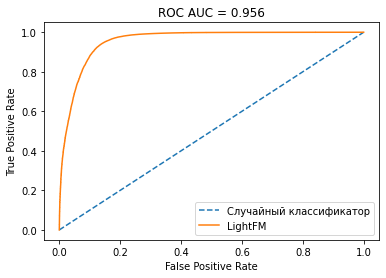

In [149]:
from sklearn.metrics import roc_curve, roc_auc_score

def show_roc_curve(y_true, y_pred_prob):
    """Функция отображает ROC-кривую"""
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    plt.figure()
    plt.plot([0, 1], label='Случайный классификатор', linestyle='--')
    plt.plot(fpr, tpr, label = 'LightFM')
    plt.title('ROC AUC = %0.3f' % roc_auc_score(y_true, y_pred_prob))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()
    
    
    
show_roc_curve(test_data_f.rating, preds_f)    

In [150]:
df_f.columns

Index(['verified', 'reviewerName', 'reviewText', 'unixReviewTime', 'vote',
       'userid', 'itemid', 'rating', 'sample', 'brand', 'rank', 'main_cat',
       'price', 'review_year', 'review_month', 'review_day'],
      dtype='object')

In [151]:
preds_ft = model2.predict(test.userid.values,
                      test.itemid.values)

In [152]:
preds_ft.shape

(285965,)

In [153]:
normalized_preds_ft = (preds_ft - preds_ft.min())/(preds_ft - preds_ft.min()).max()
submission['rating']= normalized_preds_ft
submission.to_csv('submission_ft.csv', index=False)

* В ходе работы был проведен анализ данных, их чистка, заполнение и отсев. Были построеные модели на отобранных признаках, а также модель при учете некоторого числа сгенерированных признаков, что, однако, не дало улучшения результата. Это свидетельствует о малой значимости созданных фичей для модели. Тем не менее удалось получить значение на сабмите больше 0.760, что является незначительным улучшением базового ноутбука по данном заданию.